In [20]:
# Clustering Models
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
from collections import Counter
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import pdist
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs, load_iris, make_moons
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cut_tree
# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report, 
f1_score, silhouette_score, adjusted_rand_score)

# Display all columns
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [2]:
cln = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'Class']

# Import DataFrame
df = pd.read_csv('iris.csv', engine='pyarrow', names=cln) 
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Data Integrity Check
print("Big Query Statistics:")
print('-' * 127)
print(f"🚣‍♀️ DataFrame Shape: {df.shape}")
print('-' * 127)
print(f"Columns to list:\n{df.columns.tolist()}")
print('-' * 127)
print(f"📊 DataFrame Info: {df.info(memory_usage='deep')}")
print('-' * 127)
print(f"📈 DataFrame Distribution:\n {df.describe()}")
print('-' * 127)

missing_values = df.isna().sum()

if len(missing_values) < 0:
    print("❌ Missing data for following columns:")
else:
    print(f"✅ No missing values for df:\n{missing_values}")

Big Query Statistics:
-------------------------------------------------------------------------------------------------------------------------------
🚣‍♀️ DataFrame Shape: (150, 5)
-------------------------------------------------------------------------------------------------------------------------------
Columns to list:
['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'Class']
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   Class            150 non-null    object 
dtypes: float64(4), object(1)
memory

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


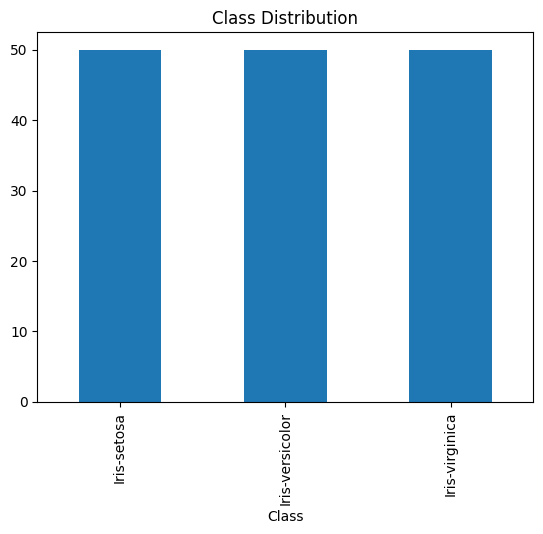

In [6]:
# Value_counts - Unique
objects = df.select_dtypes(include=['object','category'])
for col in objects.columns:
    #print(f"\n{col}:")
    #print(f"{'='*127}")
    print(df[col].value_counts())
    df['Class'].value_counts().plot(kind='bar')
    plt.title('Class Distribution')
    plt.show()

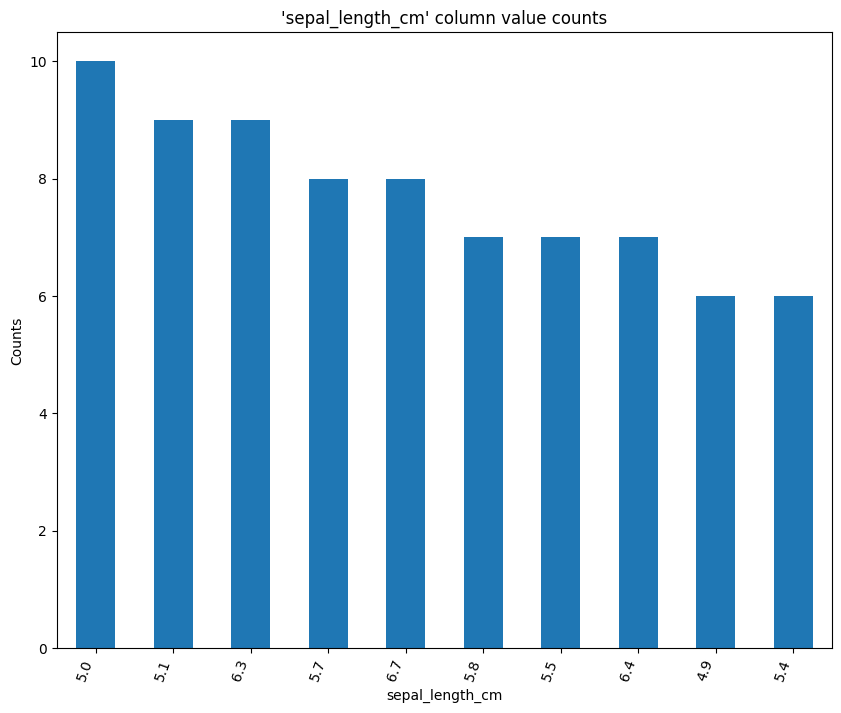

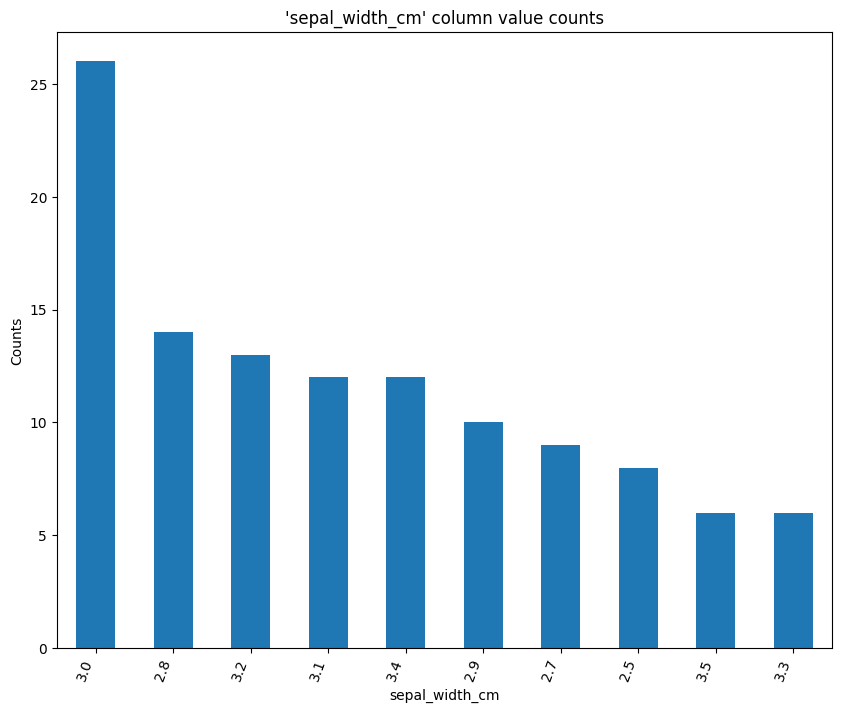

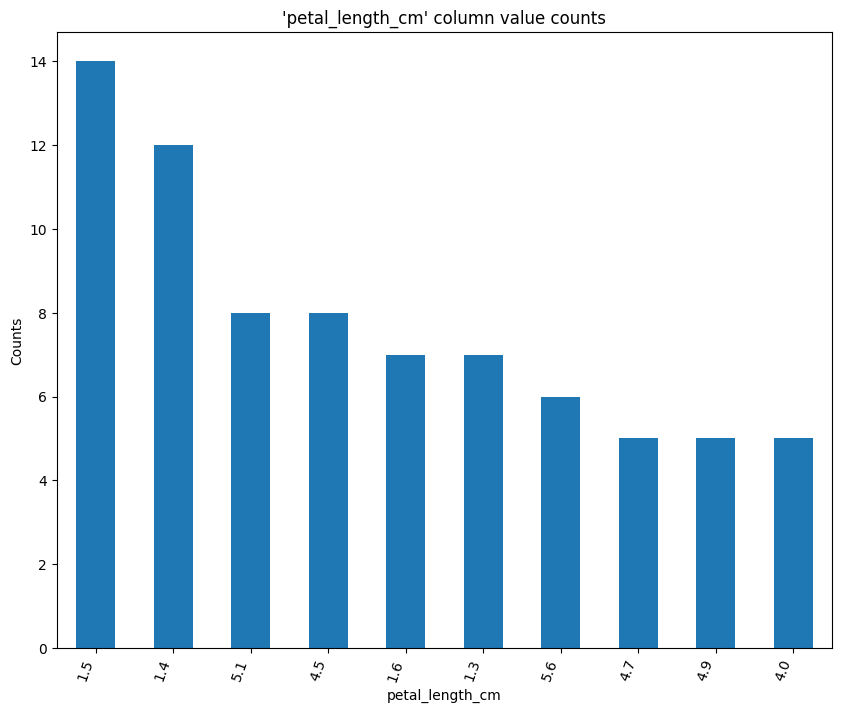

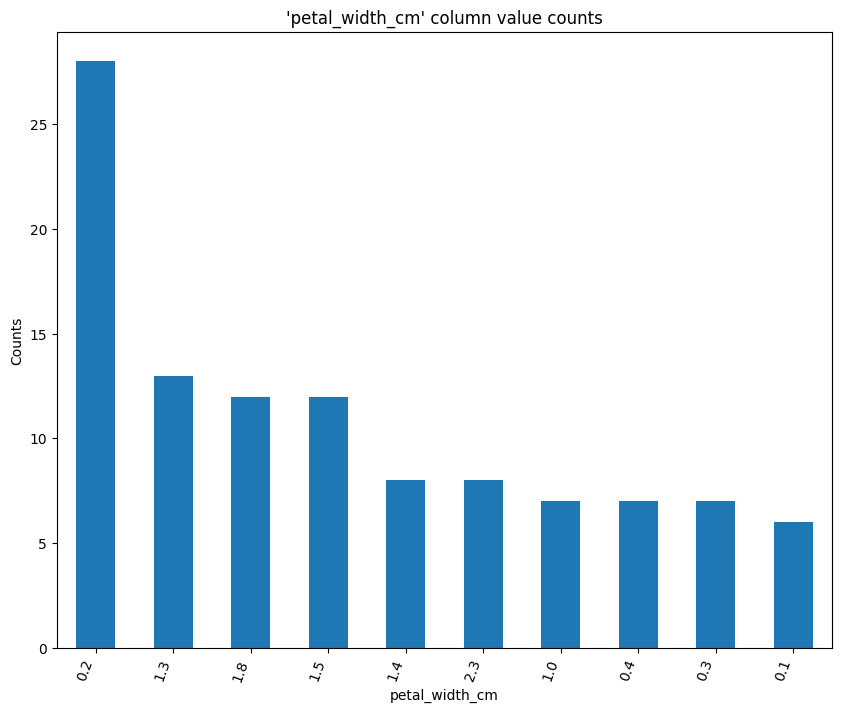

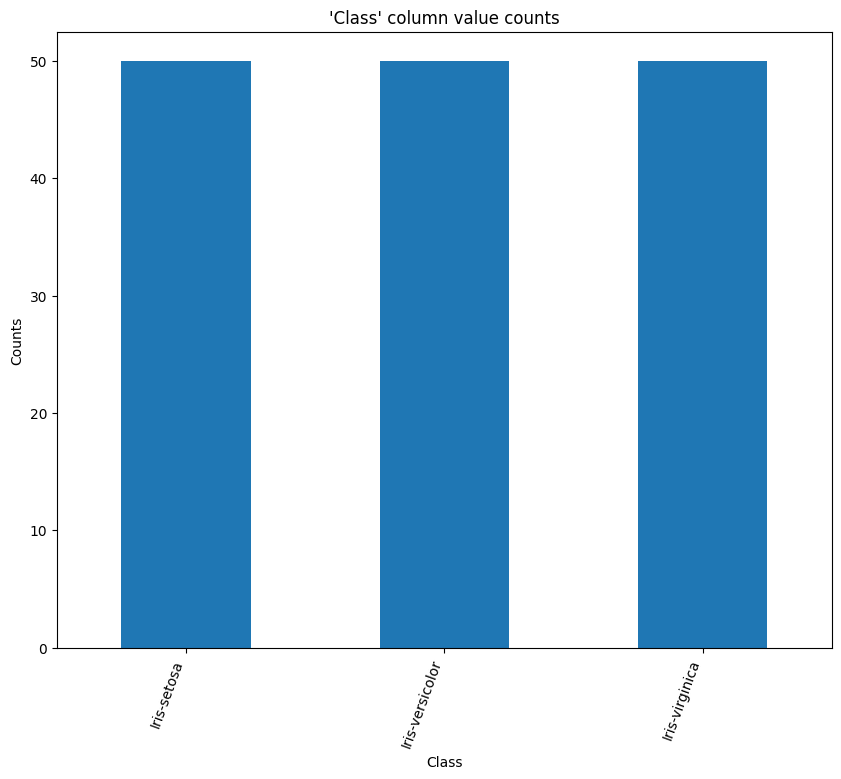

In [7]:
# Data Distribution
# Exploratory Data Analysis
def eda_plot(column, topn=10):
    plt.figure(figsize=(10, 8))
    df[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 70, ha='right')
    plt.show()

columns = df.columns

for column in columns:
    eda_plot(column)

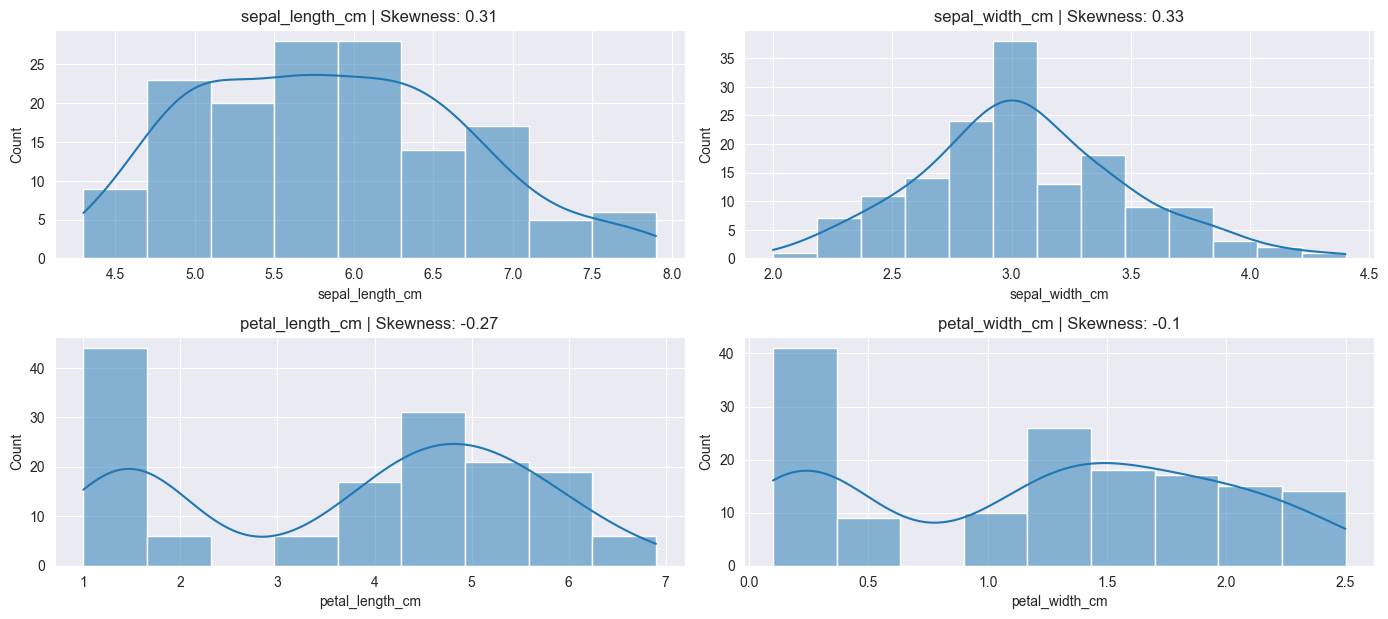

In [8]:
# Kernel Density Plot for understanding variance in the dataset
sns.set_style("darkgrid")
numerical_columns = df.select_dtypes(include=["int", "float"]).columns 
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

In [13]:
# Option 1: Use a loop for multiple columns
categorical_cols = df.select_dtypes(include=['object', 'category'])
label_encoders = {} 

for col in categorical_cols: 
    le = LabelEncoder() 
    df[f'{col}_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for potential inverse transform

In [15]:
flower_class = df['Class']

In [16]:
# Drop categorical columns
df.drop(df.select_dtypes(include=['object', 'category']), axis=1, inplace=True) 

Total data points: 150
Features used: ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'cluster']
Data shape: (150, 5)


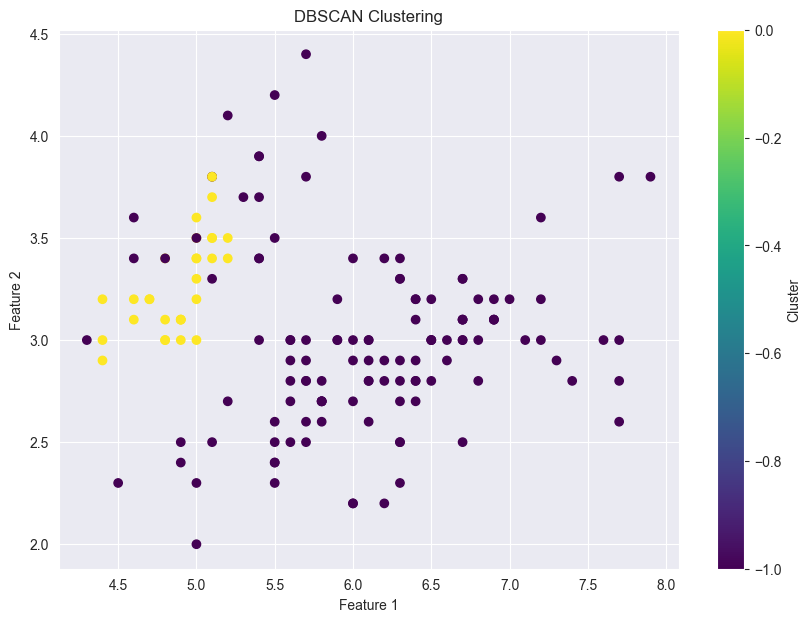

Number of clusters: 1
Number of noise points: 120
     sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  cluster  Class_encoded
0                5.1             3.5              1.4             0.2        0              0
1                4.9             3.0              1.4             0.2        0              0
2                4.7             3.2              1.3             0.2        0              0
3                4.6             3.1              1.5             0.2        0              0
4                5.0             3.6              1.4             0.2        0              0
..               ...             ...              ...             ...      ...            ...
145              6.7             3.0              5.2             2.3       -1              2
146              6.3             2.5              5.0             1.9       -1              2
147              6.5             3.0              5.2             2.0       -1              2
148       

In [18]:
# Basic DBSCAN Example
from sklearn.cluster import DBSCAN

X_clus = df.drop(columns=['Class_encoded'], axis=1)

# Additional info about your data
print(f"Total data points: {len(X_clus)}")
print(f"Features used: {list(X_clus.columns)}")
print(f"Data shape: {X_clus.shape}") 

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
clusters = dbscan.fit_predict(X_clus)

# Plot results
plt.figure(figsize=(10, 7))
plt.scatter(X_clus.iloc[:, 0], X_clus.iloc[:, 1], c=clusters, cmap='viridis', marker='o')
#plt.scatter(X_clus['sex_encoded'], X_clus['diameter'], c=clusters, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# Print cluster info
print(f"Number of clusters: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Number of noise points: {list(clusters).count(-1)}")

# Add cluster labels to dataframe
df['cluster'] = clusters

print(df)
print(f"\nCluster summary:")
print(df.groupby('cluster').mean()) 

In [23]:
X.iloc[:,0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length_cm, Length: 150, dtype: float64

1. BASIC HIERARCHICAL CLUSTERING
-------------------------------------------------------------------------------------------------------------------------------


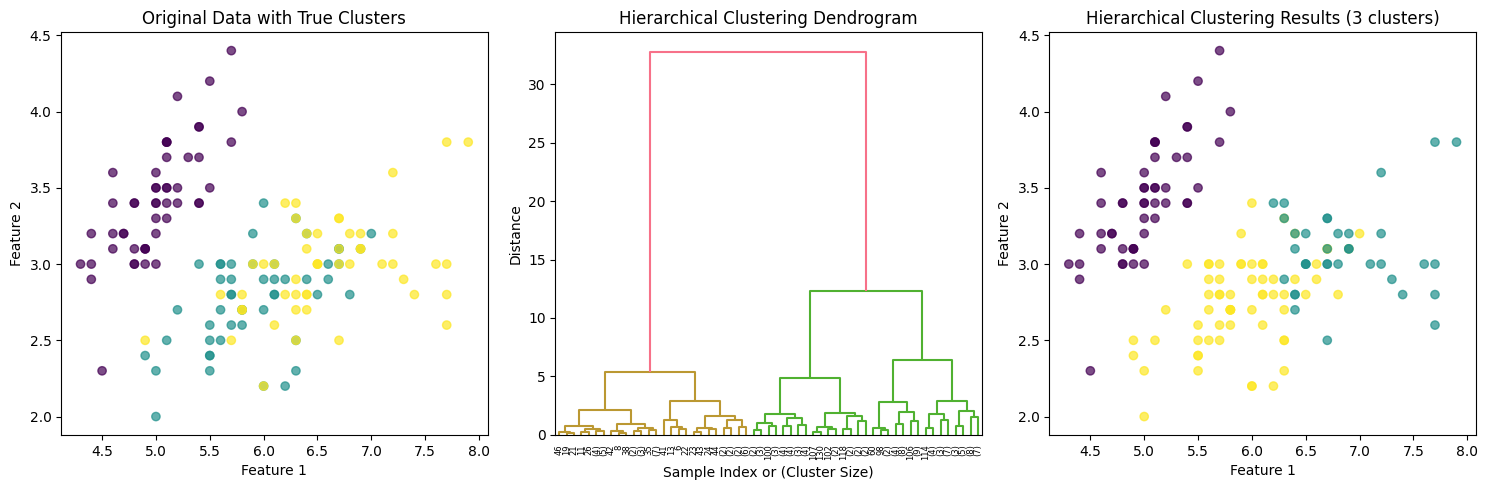

Number of clusters formed: 3
Cluster assignments: [1 1 1 1 1 1 1 1 1 1]...


In [25]:
# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Example 1: Basic Hierarchical Clustering with Synthetic Data
print("1. BASIC HIERARCHICAL CLUSTERING")
print("-" * 127)

# Generate synthetic data
np.random.seed(42)
# X, y_true = make_blobs(n_samples=50, centers=3, cluster_std=1.5, center_box=(-10.0, 10.0), random_state=42)
X = df.drop(columns=['Class_encoded'])
y_true = df['Class_encoded']

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')

# Create dendrogram
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis', alpha=0.7)
plt.title('Original Data with True Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 3, 2)
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')

# Cut the dendrogram to get clusters
clusters = fcluster(linkage_matrix, 3, criterion='maxclust')

plt.subplot(1, 3, 3)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Hierarchical Clustering Results (3 clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

print(f"Number of clusters formed: {len(np.unique(clusters))}")
print(f"Cluster assignments: {clusters[:10]}...")  # Show first 10

2. DIFFERENT LINKAGE METHODS


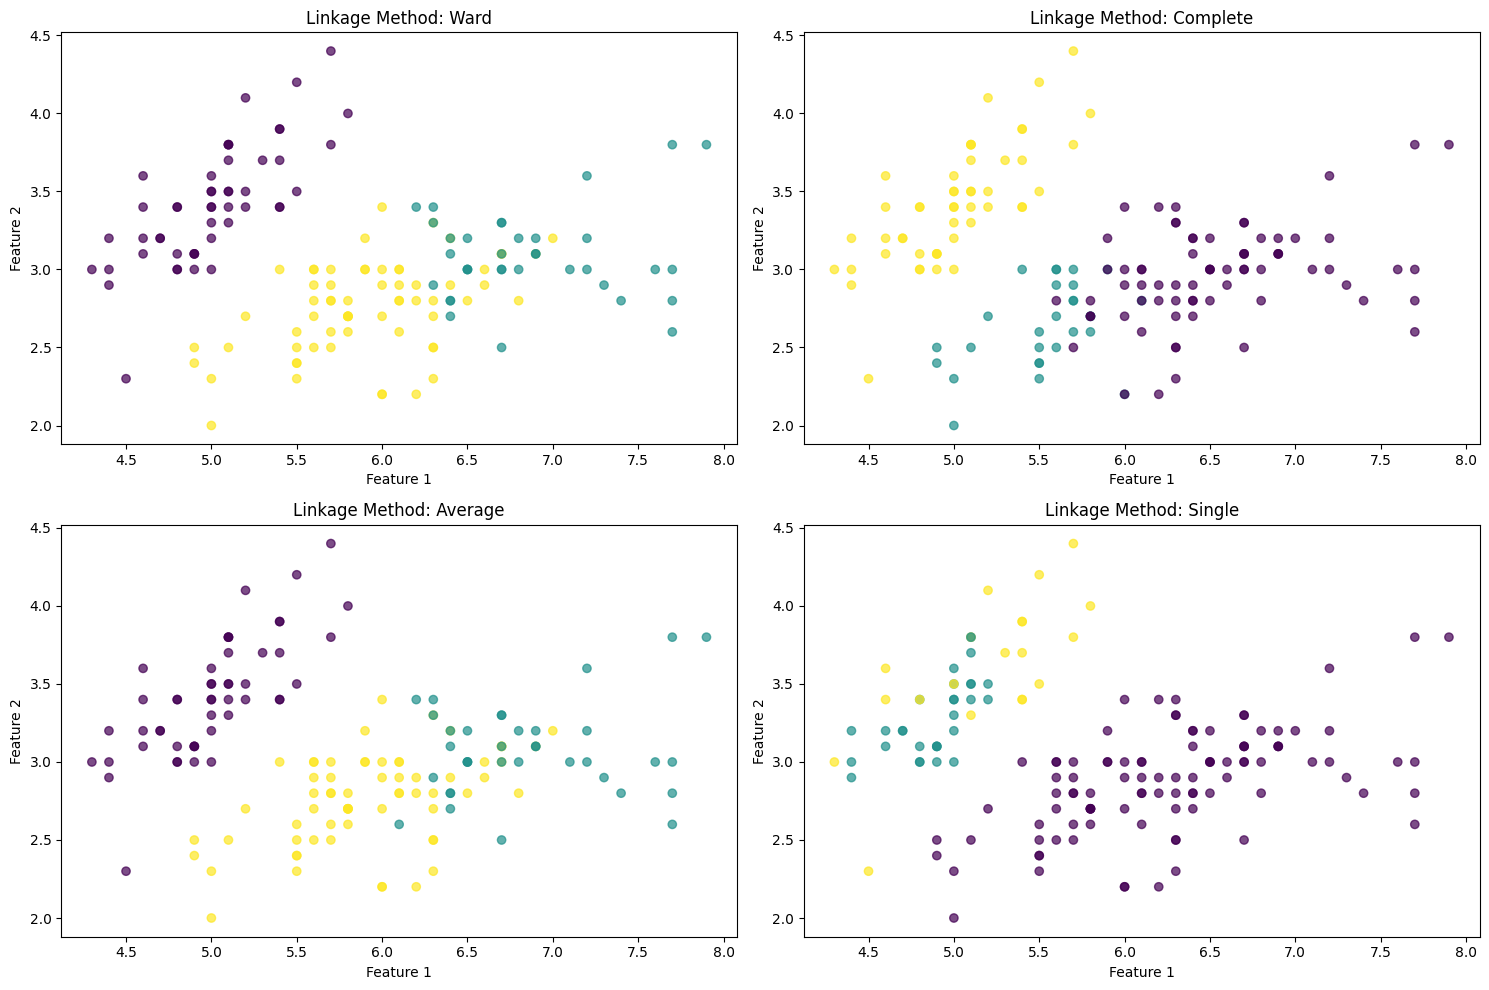

In [26]:
# Example 2: Different Linkage Methods
print("2. DIFFERENT LINKAGE METHODS")

# Test different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, method in enumerate(linkage_methods):
    # Perform clustering
    if method == 'ward':
        linkage_matrix = linkage(X, method=method)
    else:
        # Ward requires euclidean distance, others can use different metrics
        linkage_matrix = linkage(X, method=method, metric='euclidean')
    
    clusters = fcluster(linkage_matrix, 3, criterion='maxclust')
    
    # Plot results
    axes[i].scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    axes[i].set_title(f'Linkage Method: {method.capitalize()}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [34]:
df.drop('cluster', axis=1, inplace=True)

In [35]:
df.head(2)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Class_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


3. REAL DATASET - IRIS CLUSTERING


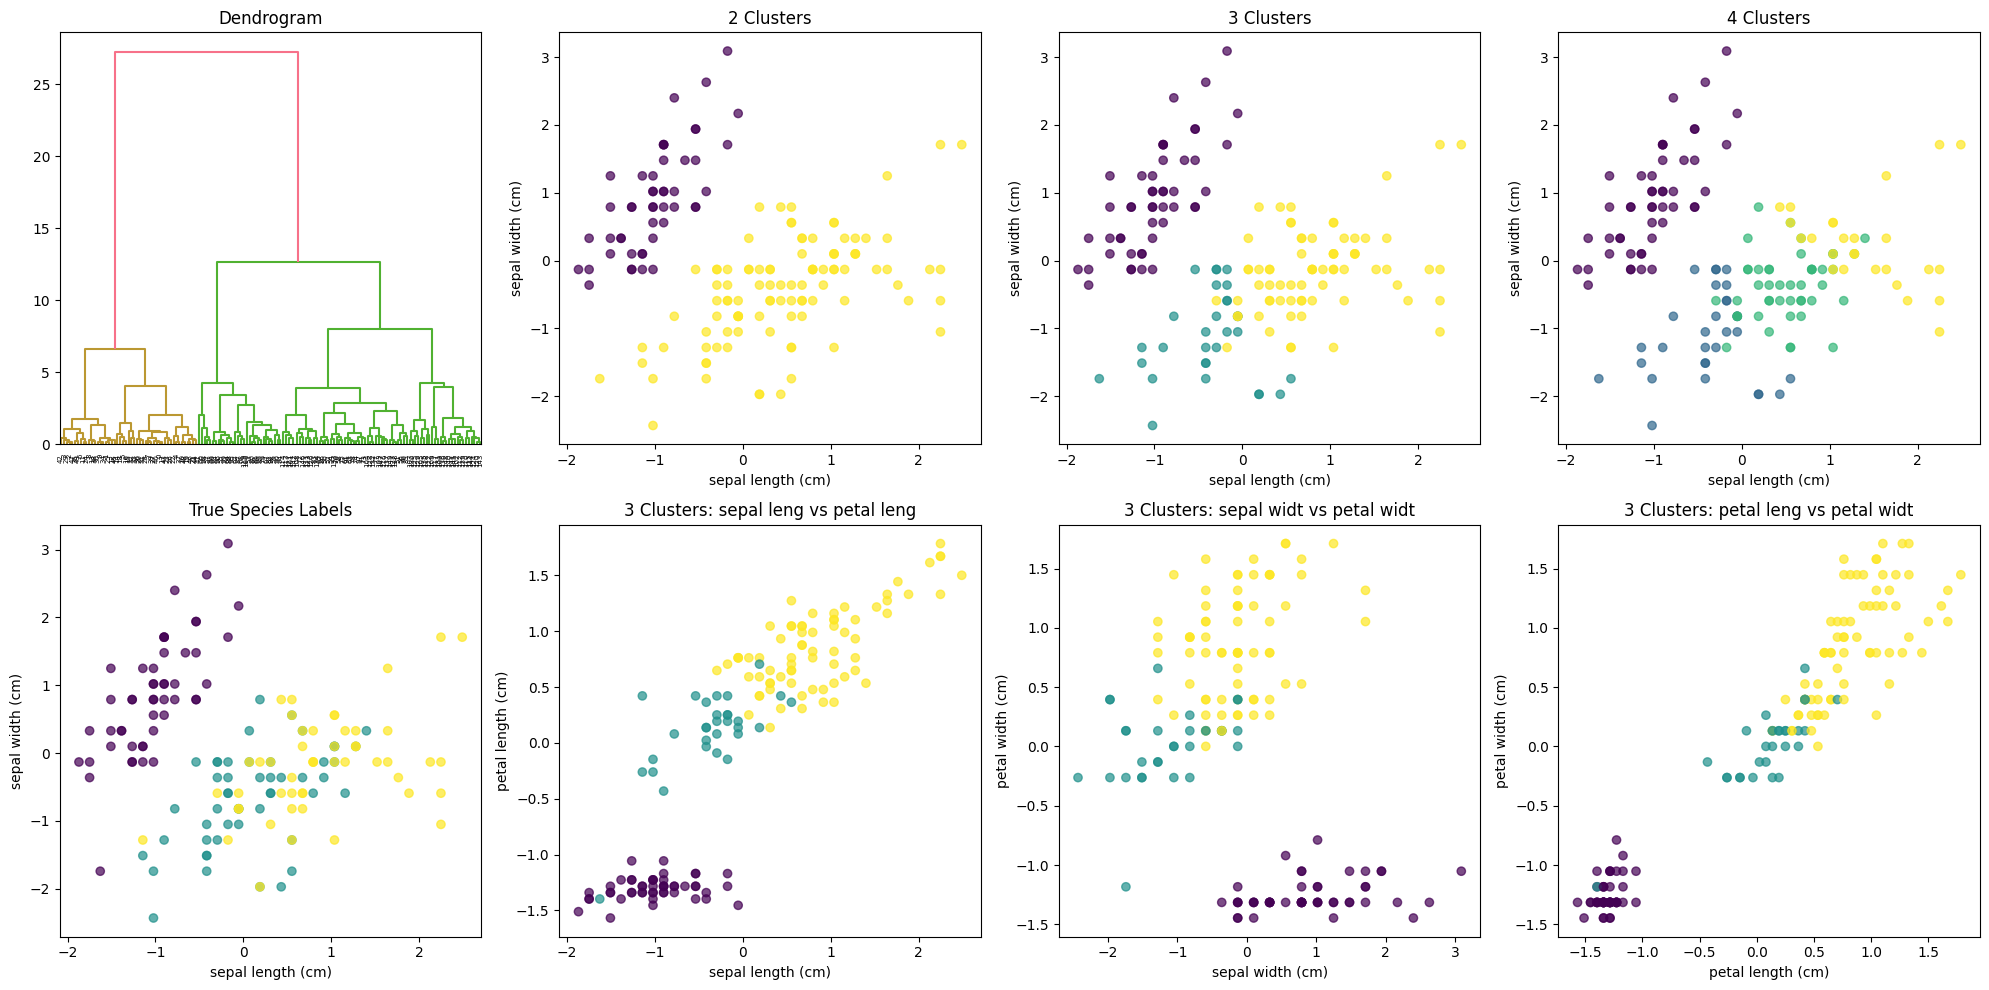

Iris dataset shape: (150, 4)
True number of species: 3
Hierarchical clustering with 3 clusters:

Cluster vs True Species Cross-tabulation:
Predicted Cluster   1   2   3
True Species                 
0                  49   1   0
1                   0  27  23
2                   0   2  48

Clustering Performance Metrics:
Adjusted Rand Index: 0.615
Silhouette Score: 0.447

Cluster Characteristics (mean values):

Cluster 1:
Size: 49 samples
Mean feature values:
  sepal length (cm): -1.002
  sepal width (cm): 0.906
  petal length (cm): -1.303
  petal width (cm): -1.256

Cluster 2:
Size: 30 samples
Mean feature values:
  sepal length (cm): -0.380
  sepal width (cm): -1.129
  petal length (cm): 0.098
  petal width (cm): 0.010

Cluster 3:
Size: 71 samples
Mean feature values:
  sepal length (cm): 0.852
  sepal width (cm): -0.148
  petal length (cm): 0.858
  petal width (cm): 0.863


In [41]:
# Example 3: Iris Dataset - Fixed Version
print("3. REAL DATASET - IRIS CLUSTERING")

# Load the complete Iris dataset to ensure we have all features
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
feature_names = X.columns

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Create comprehensive visualization - Fixed grid size
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Dendrogram
axes[0, 0].set_title('Dendrogram')
dendrogram(linkage_matrix, ax=axes[0, 0], truncate_mode='level', p=10)

# Different number of clusters
n_clusters_list = [2, 3, 4]
for i, n_clusters in enumerate(n_clusters_list):
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    
    # Plot first two features
    axes[0, i+1].scatter(X_scaled[:, 0], X_scaled[:, 1], 
                        c=clusters, cmap='viridis', alpha=0.7)
    axes[0, i+1].set_title(f'{n_clusters} Clusters')
    axes[0, i+1].set_xlabel(feature_names[0])
    axes[0, i+1].set_ylabel(feature_names[1])

# True labels
axes[1, 0].scatter(X_scaled[:, 0], X_scaled[:, 1], 
                  c=y, cmap='viridis', alpha=0.7)
axes[1, 0].set_title('True Species Labels')
axes[1, 0].set_xlabel(feature_names[0])
axes[1, 0].set_ylabel(feature_names[1])

# Feature comparison with 3 clusters
clusters_3 = fcluster(linkage_matrix, 3, criterion='maxclust')

# Plot different feature combinations
feature_pairs = [(0, 2), (1, 3), (2, 3)]
for i, (feat1, feat2) in enumerate(feature_pairs):
    axes[1, i+1].scatter(X_scaled[:, feat1], X_scaled[:, feat2], 
                        c=clusters_3, cmap='viridis', alpha=0.7)
    axes[1, i+1].set_title(f'3 Clusters: {feature_names[feat1][:10]} vs {feature_names[feat2][:10]}')
    axes[1, i+1].set_xlabel(feature_names[feat1])
    axes[1, i+1].set_ylabel(feature_names[feat2])

plt.tight_layout()
plt.show()

# Cluster analysis
print(f"Iris dataset shape: {X.shape}")
print(f"True number of species: {len(np.unique(y))}")
print(f"Hierarchical clustering with 3 clusters:")

# Create comparison table
df_comparison = pd.DataFrame({
    'True_Species': y,
    'Predicted_Cluster': clusters_3
})

print("\nCluster vs True Species Cross-tabulation:")
print(pd.crosstab(df_comparison['True_Species'], df_comparison['Predicted_Cluster'], 
                  rownames=['True Species'], colnames=['Predicted Cluster']))

# Calculate clustering metrics
from sklearn.metrics import adjusted_rand_score, silhouette_score

ari_score = adjusted_rand_score(y, clusters_3)
silhouette_avg = silhouette_score(X_scaled, clusters_3)

print(f"\nClustering Performance Metrics:")
print(f"Adjusted Rand Index: {ari_score:.3f}")
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Analyze cluster characteristics
print("\nCluster Characteristics (mean values):")
cluster_stats = pd.DataFrame(X_scaled, columns=feature_names)
cluster_stats['Cluster'] = clusters_3

for cluster in sorted(np.unique(clusters_3)):
    print(f"\nCluster {cluster}:")
    cluster_data = cluster_stats[cluster_stats['Cluster'] == cluster]
    print(f"Size: {len(cluster_data)} samples")
    print("Mean feature values:")
    for feature in feature_names:
        mean_val = cluster_data[feature].mean()
        print(f"  {feature}: {mean_val:.3f}")

4. SCIKIT-LEARN AGGLOMERATIVE CLUSTERING
Sklearn clusters: [1 1 1 1 1 1 1 1 1 1]...
Scipy clusters:   [0 0 0 0 0 0 0 0 0 0]...


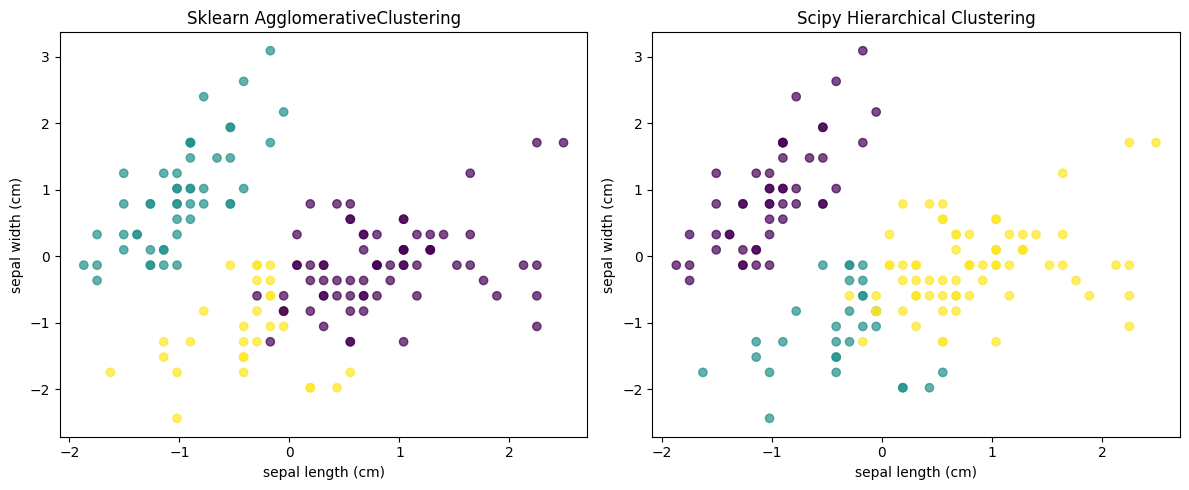

In [42]:
# Example 4: Using Scikit-learn's AgglomerativeClustering
print("4. SCIKIT-LEARN AGGLOMERATIVE CLUSTERING")

# Using sklearn's implementation
agg_clustering = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward',
    compute_distances=True
)

# Fit and predict
sklearn_clusters = agg_clustering.fit_predict(X_scaled)

# Compare with scipy implementation
print(f"Sklearn clusters: {sklearn_clusters[:10]}...")
print(f"Scipy clusters:   {clusters_3[:10] - 1}...")  # Adjust for 0-based indexing

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], 
               c=sklearn_clusters, cmap='viridis', alpha=0.7)
axes[0].set_title('Sklearn AgglomerativeClustering')
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], 
               c=clusters_3, cmap='viridis', alpha=0.7)
axes[1].set_title('Scipy Hierarchical Clustering')
axes[1].set_xlabel(feature_names[0])
axes[1].set_ylabel(feature_names[1])

plt.tight_layout()
plt.show()

5. FINDING OPTIMAL NUMBER OF CLUSTERS


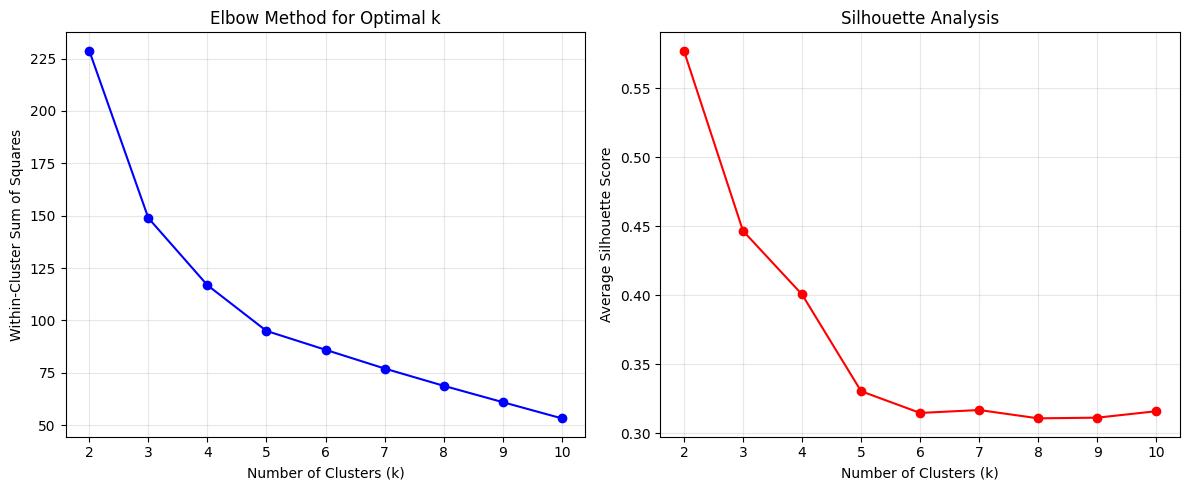

Optimal number of clusters (Silhouette): 2
Best silhouette score: 0.577


In [44]:
print("5. FINDING OPTIMAL NUMBER OF CLUSTERS")

# Method 1: Elbow method using within-cluster sum of squares
from sklearn.metrics import silhouette_score

def calculate_wcss(X, clusters):
    """Calculate Within-Cluster Sum of Squares"""
    wcss = 0
    for i in np.unique(clusters):
        cluster_points = X[clusters == i]
        centroid = np.mean(cluster_points, axis=0)
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

# Test different numbers of clusters
k_range = range(2, 11)
wcss_values = []
silhouette_scores = []

for k in k_range:
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    wcss = calculate_wcss(X_scaled, clusters)
    sil_score = silhouette_score(X_scaled, clusters)
    
    wcss_values.append(wcss)
    silhouette_scores.append(sil_score)

# Plot optimization metrics
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Elbow method
axes[0].plot(k_range, wcss_values, 'bo-')
axes[0].set_title('Elbow Method for Optimal k')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Within-Cluster Sum of Squares')
axes[0].grid(True, alpha=0.3)

# Silhouette analysis
axes[1].plot(k_range, silhouette_scores, 'ro-')
axes[1].set_title('Silhouette Analysis')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Average Silhouette Score')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal k
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (Silhouette): {optimal_k_silhouette}")
print(f"Best silhouette score: {max(silhouette_scores):.3f}")

In [46]:
from sklearn.metrics.pairwise import distance_metrics
print(distance_metrics().keys())  # See all available metrics

dict_keys(['cityblock', 'cosine', 'euclidean', 'haversine', 'l2', 'l1', 'manhattan', 'precomputed', 'nan_euclidean'])


6. DIFFERENT DISTANCE METRICS


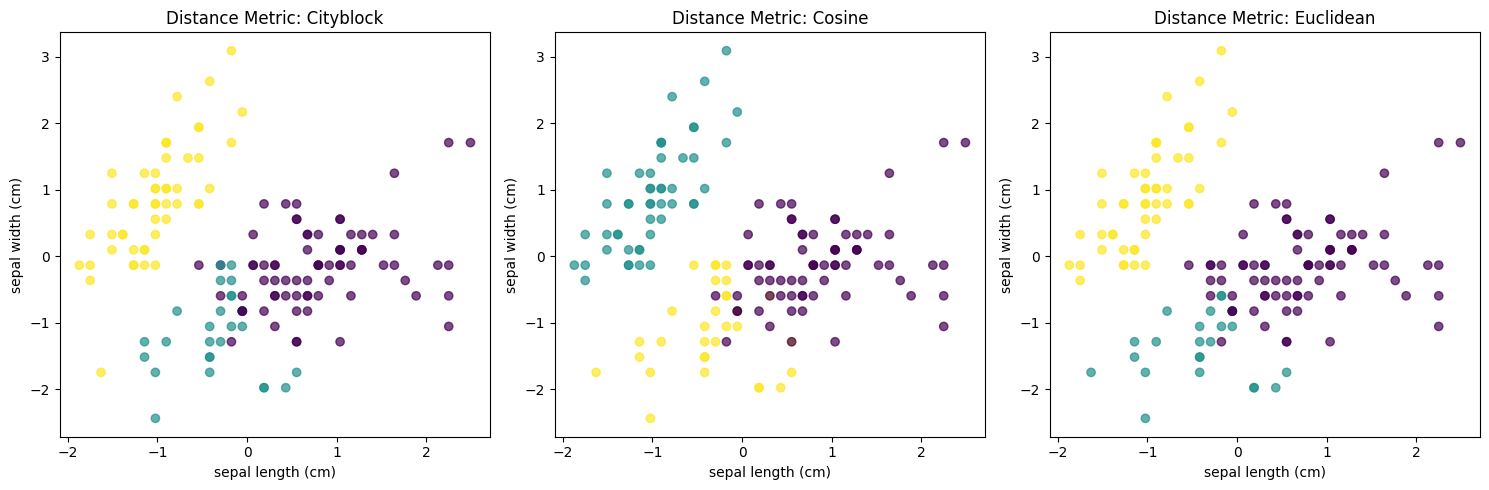

In [54]:
# Example 6: Distance Metrics and Custom Parameters
print("6. DIFFERENT DISTANCE METRICS")

# Test different distance metrics
distance_metrics = ['cityblock', 'cosine', 'euclidean']
#or
#distance_metrics = ['euclidean', 'l1', 'cosine']  # L1 norm
# or
#distance_metrics = ['euclidean', 'cityblock', 'cosine']  # scipy name
# or  
#distance_metrics = ['euclidean', 'taxicab', 'cosine']  # another name 

#distance_metrics = ['euclidean', 'manhattan', 'cosine']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, metric in enumerate(distance_metrics):
    # Calculate distance matrix
    if metric == 'cosine':
        # Cosine distance
        distances = pdist(X_scaled, metric='cosine')
    else:
        distances = pdist(X_scaled, metric=metric)
    
    # Perform clustering (use complete linkage for non-euclidean metrics)
    linkage_matrix = linkage(distances, method='complete')
    clusters = fcluster(linkage_matrix, 3, criterion='maxclust')
    
    # Plot
    axes[i].scatter(X_scaled[:, 0], X_scaled[:, 1], 
                   c=clusters, cmap='viridis', alpha=0.7)
    axes[i].set_title(f'Distance Metric: {metric.capitalize()}')
    axes[i].set_xlabel(feature_names[0])
    axes[i].set_ylabel(feature_names[1])

plt.tight_layout()
plt.show()

7. PRACTICAL EXAMPLE - CUSTOMER SEGMENTATION

Customer Data Sample:


,Age,Income,Spending_Score,Purchase_Frequency
0,45.960570,55366.810405,42.067131,3
1,38.340828,58411.767896,28.067300,6
2,47.772262,66245.768648,26.581174,7
3,58.276358,65807.030781,100.000000,8
4,37.190160,29334.959481,81.477200,6


Dataset shape: (200, 4)
-------------------------------------------------------------------------------------------------------------------------------
Basic Statistics:


,Age,Income,Spending_Score,Purchase_Frequency
count,200.000000,200.000000,200.000000,200.000000
mean,39.510748,51288.022803,52.150159,4.980000
std,11.172047,14805.057165,28.706343,2.261675
min,8.563059,1380.989899,2.439922,0.000000
25%,31.538468,40912.436933,26.154883,3.000000
50%,39.949697,51182.590232,53.361740,5.000000
75%,46.010230,60308.467111,76.479357,7.000000
max,72.642030,107790.972360,100.000000,11.000000


-------------------------------------------------------------------------------------------------------------------------------
Optimal number of customer segments: 7
-------------------------------------------------------------------------------------------------------------------------------
Customer Segment Analysis:
           Age           Income           Spending_Score        Purchase_Frequency      
          mean    std      mean       std           mean    std               mean   std
Cluster                                                                                 
1        39.96  13.90  42222.13   9035.86          84.05  12.50               4.07  1.62
2        38.73   7.45  65197.71   8994.40          66.59  20.41               4.22  1.64
3        45.46  12.42  70235.61  13236.39          82.25  21.33               8.29  1.94
4        47.75   6.88  43600.26   8083.26          45.12  23.74               7.19  1.17
5        32.63   9.05  54695.74  12635.89          30.3

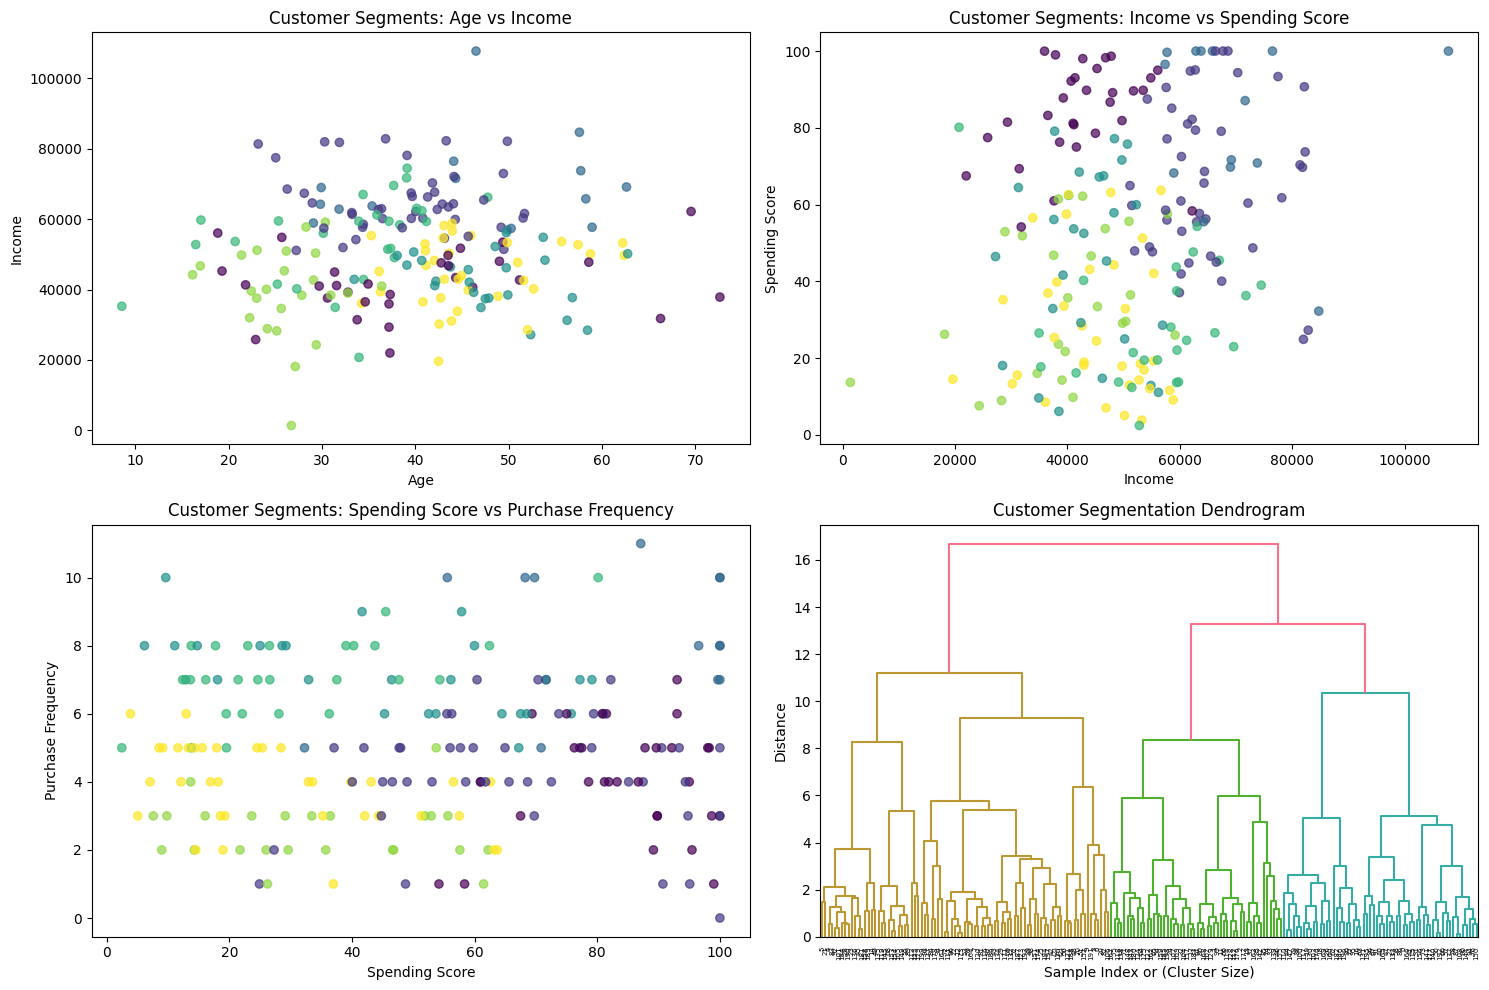

In [61]:
# Example 7: Customer Segmentation
print(f"7. PRACTICAL EXAMPLE - CUSTOMER SEGMENTATION\n")

# Create synthetic customer data
np.random.seed(42)
n_customers = 200

# Customer features
age = np.random.normal(40, 12, n_customers)
income = np.random.normal(50000, 15000, n_customers)
spending_score = np.random.uniform(1, 100, n_customers)
frequency = np.random.poisson(5, n_customers)

# Create customer dataset
customer_data = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Spending_Score': spending_score,
    'Purchase_Frequency': frequency
})

# Add some correlation to make it more realistic
customer_data.loc[customer_data['Income'] > 60000, 'Spending_Score'] += 20
customer_data['Spending_Score'] = np.clip(customer_data['Spending_Score'], 1, 100)

print("Customer Data Sample:")
display(customer_data.head())
print(f"Dataset shape: {customer_data.shape}")
print("-" * 127)
print("Basic Statistics:")
display(customer_data.describe())
print("-" * 127) 

# Standardize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

# Perform hierarchical clustering
linkage_matrix_customers = linkage(customer_data_scaled, method='ward')

# Determine optimal clusters
k_range = range(2, 8)
silhouette_scores_cust = []

for k in k_range:
    clusters = fcluster(linkage_matrix_customers, k, criterion='maxclust')
    score = silhouette_score(customer_data_scaled, clusters)
    silhouette_scores_cust.append(score)

optimal_k = k_range[np.argmax(silhouette_scores_cust)]
print(f"Optimal number of customer segments: {optimal_k}")
print("-" * 127) 

# Create final clustering
customer_clusters = fcluster(linkage_matrix_customers, optimal_k, criterion='maxclust')
customer_data['Cluster'] = customer_clusters

# Analyze customer segments
print(f"Customer Segment Analysis:")

segment_analysis = customer_data.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Income': ['mean', 'std'],
    'Spending_Score': ['mean', 'std'],
    'Purchase_Frequency': ['mean', 'std']
}).round(2)

print(segment_analysis)
print("-" * 127) 

# Visualize customer segments
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age vs Income
axes[0, 0].scatter(customer_data['Age'], customer_data['Income'], 
                  c=customer_clusters, cmap='viridis', alpha=0.7)
axes[0, 0].set_title('Customer Segments: Age vs Income')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Income')

# Income vs Spending Score
axes[0, 1].scatter(customer_data['Income'], customer_data['Spending_Score'], 
                  c=customer_clusters, cmap='viridis', alpha=0.7)
axes[0, 1].set_title('Customer Segments: Income vs Spending Score')
axes[0, 1].set_xlabel('Income')
axes[0, 1].set_ylabel('Spending Score')

# Spending Score vs Purchase Frequency
axes[1, 0].scatter(customer_data['Spending_Score'], customer_data['Purchase_Frequency'], 
                  c=customer_clusters, cmap='viridis', alpha=0.7)
axes[1, 0].set_title('Customer Segments: Spending Score vs Purchase Frequency')
axes[1, 0].set_xlabel('Spending Score')
axes[1, 0].set_ylabel('Purchase Frequency')

# Dendrogram
axes[1, 1].set_title('Customer Segmentation Dendrogram')
dendrogram(linkage_matrix_customers, ax=axes[1, 1], truncate_mode='level', p=10)
axes[1, 1].set_xlabel('Sample Index or (Cluster Size)')
axes[1, 1].set_ylabel('Distance')

plt.tight_layout()
plt.show()

1. ELBOW METHOD ANALYSIS


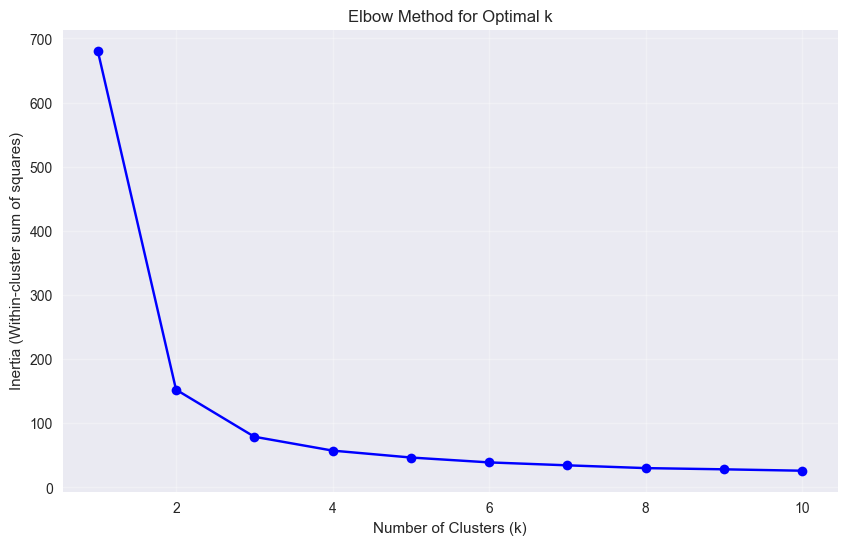

-------------------------------------------------------------------------------------------------------------------------------


In [62]:
# Example 1: Finding Optimal K using Elbow Method
# Set style for better plots
plt.style.use('seaborn-v0_8')
np.random.seed(42)

X = df.drop(columns=['Class_encoded'], axis=1) 

def elbow_method(X, max_k=10):
    """Find optimal k using elbow method"""
    inertias = []
    k_range = range(1, max_k + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertias, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-cluster sum of squares)')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return k_range, inertias

# Example 1: Elbow Method
print("1. ELBOW METHOD ANALYSIS")
k_range, inertias = elbow_method(X, max_k=10)
print("-" * 127)

2. SILHOUETTE ANALYSIS
k=2: Silhouette Score = 0.681
k=3: Silhouette Score = 0.553
k=4: Silhouette Score = 0.498
k=5: Silhouette Score = 0.489
k=6: Silhouette Score = 0.368
k=7: Silhouette Score = 0.355
k=8: Silhouette Score = 0.352
k=9: Silhouette Score = 0.343
k=10: Silhouette Score = 0.319


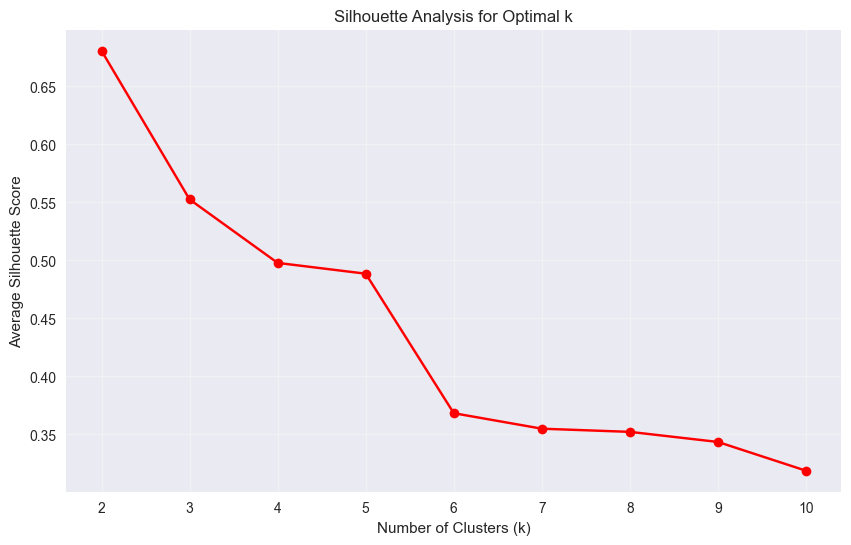

Optimal k based on silhouette score: 2
-------------------------------------------------------------------------------------------------------------------------------


In [67]:
# Example 2: Silhouette Analysis
def silhouette_analysis(X, max_k=10):
    """Analyze silhouette scores for different k values"""
    silhouette_scores = []
    k_range = range(2, max_k + 1)  # Start from 2 (need at least 2 clusters)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f'k={k}: Silhouette Score = {silhouette_avg:.3f}')
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, 'ro-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Average Silhouette Score')
    plt.title('Silhouette Analysis for Optimal k')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Find optimal k
    optimal_k = k_range[np.argmax(silhouette_scores)]
    print(f'Optimal k based on silhouette score: {optimal_k}')
    
    return k_range, silhouette_scores, optimal_k

# Example 2: Silhouette Analysis
print("2. SILHOUETTE ANALYSIS")
k_range_sil, sil_scores, optimal_k = silhouette_analysis(X, max_k=10)
print("-" * 127)

In [68]:
# Example 3: Comprehensive Parameter Tuning
def comprehensive_tuning(X, true_labels=None):
    """Comprehensive parameter tuning for K-means"""
    
    # Parameters to tune
    n_clusters_range = range(2, 11)
    init_methods = ['k-means++', 'random']
    n_init_values = [10, 20, 50]
    max_iter_values = [100, 300, 500]
    
    best_params = {}
    best_score = -1
    results = []
    
    print("Tuning K-means parameters...")
    print("-" * 127)
    
    for n_clusters in n_clusters_range:
        for init_method in init_methods:
            for n_init in n_init_values:
                for max_iter in max_iter_values:
                    # Fit K-means with current parameters
                    kmeans = KMeans(
                        n_clusters=n_clusters,
                        init=init_method,
                        n_init=n_init,
                        max_iter=max_iter,
                        random_state=42
                    )
                    
                    labels = kmeans.fit_predict(X)
                    
                    # Calculate metrics
                    silhouette = silhouette_score(X, labels)
                    inertia = kmeans.inertia_
                    
                    # If true labels available, calculate ARI
                    if true_labels is not None:
                        ari = adjusted_rand_score(true_labels, labels)
                    else:
                        ari = None
                    
                    # Store results
                    result = {
                        'n_clusters': n_clusters,
                        'init': init_method,
                        'n_init': n_init,
                        'max_iter': max_iter,
                        'silhouette_score': silhouette,
                        'inertia': inertia,
                        'ari': ari
                    }
                    results.append(result)
                    
                    # Check if this is the best configuration
                    if silhouette > best_score:
                        best_score = silhouette
                        best_params = result.copy()
    
    print(f"Best parameters (based on silhouette score):")
    for key, value in best_params.items():
        if key != 'ari' or value is not None:
            print(f"  {key}: {value}")
    
    return results, best_params

comprehensive_tuning(X) 

Tuning K-means parameters...
-------------------------------------------------------------------------------------------------------------------------------
Best parameters (based on silhouette score):
  n_clusters: 2
  init: k-means++
  n_init: 10
  max_iter: 100
  silhouette_score: 0.6808136202936816
  inertia: 152.36870647733903


([{'n_clusters': 2,
   'init': 'k-means++',
   'n_init': 10,
   'max_iter': 100,
   'silhouette_score': 0.6808136202936816,
   'inertia': 152.36870647733903,
   'ari': None},
  {'n_clusters': 2,
   'init': 'k-means++',
   'n_init': 10,
   'max_iter': 300,
   'silhouette_score': 0.6808136202936816,
   'inertia': 152.36870647733903,
   'ari': None},
  {'n_clusters': 2,
   'init': 'k-means++',
   'n_init': 10,
   'max_iter': 500,
   'silhouette_score': 0.6808136202936816,
   'inertia': 152.36870647733903,
   'ari': None},
  {'n_clusters': 2,
   'init': 'k-means++',
   'n_init': 20,
   'max_iter': 100,
   'silhouette_score': 0.6808136202936816,
   'inertia': 152.36870647733903,
   'ari': None},
  {'n_clusters': 2,
   'init': 'k-means++',
   'n_init': 20,
   'max_iter': 300,
   'silhouette_score': 0.6808136202936816,
   'inertia': 152.36870647733903,
   'ari': None},
  {'n_clusters': 2,
   'init': 'k-means++',
   'n_init': 20,
   'max_iter': 500,
   'silhouette_score': 0.6808136202936816,
 

In [69]:
# Example 4: Advanced Tuning with Different Algorithms
def compare_algorithms(X):
    """Compare different K-means algorithms"""
    algorithms = ['lloyd', 'elkan']  # Available in sklearn
    k_values = [3, 4, 5]
    
    results = {}
    
    for algorithm in algorithms:
        results[algorithm] = {}
        for k in k_values:
            # Note: algorithm parameter was available in older sklearn versions
            # In newer versions, use 'algorithm' parameter if available
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            
            # Measure fitting time
            import time
            start_time = time.time()
            labels = kmeans.fit_predict(X)
            end_time = time.time()
            
            silhouette = silhouette_score(X, labels)
            
            results[algorithm][k] = {
                'silhouette_score': silhouette,
                'inertia': kmeans.inertia_,
                'fit_time': end_time - start_time
            }
    
    # Display results
    print("Algorithm Comparison:")
    print("-" * 40)
    for alg in algorithms:
        print(f"\n{alg.upper()} Algorithm:")
        for k in k_values:
            metrics = results[alg][k]
            print(f"  k={k}: Silhouette={metrics['silhouette_score']:.3f}, "
                  f"Inertia={metrics['inertia']:.1f}, "
                  f"Time={metrics['fit_time']:.3f}s")
    
    return results

compare_algorithms(X) 

Algorithm Comparison:
----------------------------------------

LLOYD Algorithm:
  k=3: Silhouette=0.553, Inertia=78.9, Time=0.020s
  k=4: Silhouette=0.498, Inertia=57.3, Time=0.031s
  k=5: Silhouette=0.489, Inertia=46.5, Time=0.023s

ELKAN Algorithm:
  k=3: Silhouette=0.553, Inertia=78.9, Time=0.022s
  k=4: Silhouette=0.498, Inertia=57.3, Time=0.025s
  k=5: Silhouette=0.489, Inertia=46.5, Time=0.023s


{'lloyd': {3: {'silhouette_score': 0.5525919445499757,
   'inertia': 78.94084142614602,
   'fit_time': 0.01959705352783203},
  4: {'silhouette_score': 0.4978256901095472,
   'inertia': 57.31787321428571,
   'fit_time': 0.03133797645568848},
  5: {'silhouette_score': 0.4885175508886279,
   'inertia': 46.53558205128205,
   'fit_time': 0.02305006980895996}},
 'elkan': {3: {'silhouette_score': 0.5525919445499757,
   'inertia': 78.94084142614602,
   'fit_time': 0.021570682525634766},
  4: {'silhouette_score': 0.4978256901095472,
   'inertia': 57.31787321428571,
   'fit_time': 0.025109052658081055},
  5: {'silhouette_score': 0.4885175508886279,
   'inertia': 46.53558205128205,
   'fit_time': 0.023416757583618164}}}

In [70]:
# Example 5: Feature Scaling Impact
def scaling_impact_analysis(X):
    """Analyze the impact of feature scaling on K-means"""
    
    # Original data
    kmeans_orig = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels_orig = kmeans_orig.fit_predict(X)
    silhouette_orig = silhouette_score(X, labels_orig)
    
    # Scaled data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    kmeans_scaled = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels_scaled = kmeans_scaled.fit_predict(X_scaled)
    silhouette_scaled = silhouette_score(X_scaled, labels_scaled)
    
    print("Feature Scaling Impact:")
    print(f"Original data - Silhouette Score: {silhouette_orig:.3f}")
    print(f"Scaled data   - Silhouette Score: {silhouette_scaled:.3f}")
    print(f"Improvement: {((silhouette_scaled - silhouette_orig) / silhouette_orig * 100):+.1f}%")
    
    return silhouette_orig, silhouette_scaled
    
# Example 5: Feature Scaling Impact
print("5. FEATURE SCALING IMPACT")
orig_score, scaled_score = scaling_impact_analysis(X)
print("-" * 127) 

5. FEATURE SCALING IMPACT
Feature Scaling Impact:
Original data - Silhouette Score: 0.553
Scaled data   - Silhouette Score: 0.459
Improvement: -16.9%
-------------------------------------------------------------------------------------------------------------------------------
